In [1]:

#Title:  DBSCAN Clustering for Anomaly Detection

# Task 1: DBSCAN on Uniform Data

# 1. Generate a dataset with points [(-1, -1), (0, 0), (1, 1), (9, 9), (10, 10)] .
# 2. Apply DBSCAN with a small eps (e.g., 0.5) and a minimum number of points (e.g., 2).
# 3. Identify which points are treated as noise/outliers.


# Task 2: Detecting Anomalies in a Simple Dataset

# 1. Use the dataset: [(0, 0), (0, 1), (1, 0), (10, 10), (11, 11)] .
# 2. Configure DBSCAN parameters ( eps=1 , min_samples=2 ) and apply it.
# 3. Analyze the resulting clusters and classify any points identified as outliers.

# Task 3: Exploring Real World Data

# 1. Load a dataset with anomalies like credit card transactions.
# 2. Apply DBSCAN to detect unusual transactions by adjusting eps and min_samples .
# 3. Identify and discuss the points that are marked as noise, understanding why they might be considered anomalies.


--- Task 1: Uniform Data ---
Labels: [-1 -1 -1 -1 -1]
Noise points: [[-1 -1]
 [ 0  0]
 [ 1  1]
 [ 9  9]
 [10 10]]


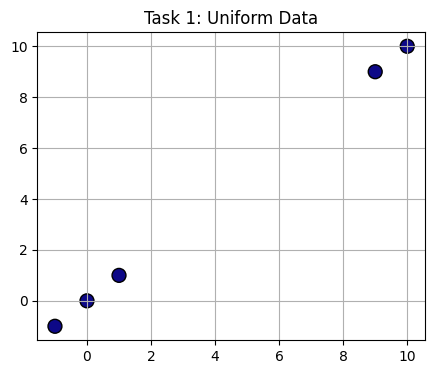


--- Task 2: Simple Dataset ---
Labels: [ 0  0  0 -1 -1]
Outliers: [[10 10]
 [11 11]]


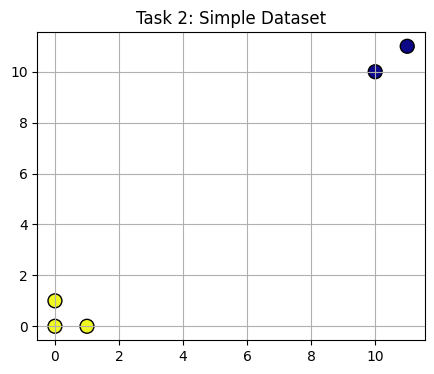


--- Task 3: Real-World Data ---
Dataset 'creditcard.csv' not found. Please place it in the working directory.


In [ ]:
# Title: DBSCAN Clustering for Anomaly Detection

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Task 1: DBSCAN on Uniform Data
# ----------------------------

print("\n--- Task 1: Uniform Data ---")

# 1. Dataset
data1 = np.array([[-1, -1], [0, 0], [1, 1], [9, 9], [10, 10]])

# 2. DBSCAN
db1 = DBSCAN(eps=0.5, min_samples=2)
labels1 = db1.fit_predict(data1)

# 3. Output results
print("Labels:", labels1)
print("Noise points:", data1[labels1 == -1])

# Optional: Visualization
plt.figure(figsize=(5, 4))
plt.title("Task 1: Uniform Data")
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, cmap='plasma', s=100, edgecolors='k')
plt.grid(True)
plt.show()


# ----------------------------
# Task 2: Detecting Anomalies in a Simple Dataset
# ----------------------------

print("\n--- Task 2: Simple Dataset ---")

# 1. Dataset
data2 = np.array([[0, 0], [0, 1], [1, 0], [10, 10], [11, 11]])

# 2. DBSCAN with eps=1 and min_samples=2
db2 = DBSCAN(eps=1, min_samples=2)
labels2 = db2.fit_predict(data2)

# 3. Output results
print("Labels:", labels2)
print("Outliers:", data2[labels2 == -1])

# Optional: Visualization
plt.figure(figsize=(5, 4))
plt.title("Task 2: Simple Dataset")
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, cmap='plasma', s=100, edgecolors='k')
plt.grid(True)
plt.show()


# ----------------------------
# Task 3: Real-World Data (e.g., Credit Card Fraud)
# ----------------------------

print("\n--- Task 3: Real-World Data ---")

# 1. Load dataset
try:
    df = pd.read_csv("creditcard.csv")  # Replace with correct path
    X = df[["V1", "V2"]]  # Using two features for visualization (modify as needed)

    # 2. Apply DBSCAN
    db3 = DBSCAN(eps=1.5, min_samples=5)
    labels3 = db3.fit_predict(X)

    df["label"] = labels3

    # 3. Identify noise
    anomalies = df[df["label"] == -1]
    print(f"Anomalies detected: {len(anomalies)}")
    print(anomalies.head())

    # Optional: Visualization
    plt.figure(figsize=(6, 5))
    plt.title("Task 3: DBSCAN on Credit Card Data (V1 vs V2)")
    plt.scatter(X["V1"], X["V2"], c=labels3, cmap='plasma', s=5)
    plt.xlabel("V1")
    plt.ylabel("V2")
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Dataset 'creditcard.csv' not found. Please place it in the working directory.")
